In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import seaborn as sns

In [2]:
data3 = pd.read_csv('bfnaics24_3_neus.csv')
data5 = pd.read_csv('bfnaics24_5_neus.csv')
data7 = pd.read_csv('bfnaics24_7_neus.csv')
data10 = pd.read_csv('bfnaics24_10_neus.csv')
cols = ['num_input', 'scale', 'awaiting_time', 'l_rule', 'diff']

In [3]:
dfs = (data3[cols], data5[cols], data7[cols], data10[cols])
print(dfs[0])
print(dfs[0]["awaiting_time"].get(1))

     num_input  scale  awaiting_time     l_rule  diff
0            3      4              1     t_stdp   0.0
1            3      4              1  pair_stdp   0.0
2            3      4              2     t_stdp   0.0
3            3      4              2  pair_stdp   0.0
4            3      4              3     t_stdp   0.0
..         ...    ...            ...        ...   ...
123          3     11              6  pair_stdp   0.0
124          3     11              7     t_stdp   0.0
125          3     11              7  pair_stdp   0.0
126          3     11              8     t_stdp   0.0
127          3     11              8  pair_stdp   0.0

[128 rows x 5 columns]
1


In [4]:
def build_heatmap(df):
    out = []
    rules = 't_stdp', 'pair_stdp'
    for i in range(len(df)):
        data = df[i]
        for r in rules:
            field = np.zeros((8,8))
            stdp_data = data[data['l_rule'] == r]
            scale = list(stdp_data['scale'])
            aw = list(stdp_data['awaiting_time'])
            d = list(stdp_data['diff'])
            for i in range(len(stdp_data)):
                #print(scale[i]-4)
                field[scale[i]-4, aw[i]-1] = d[i]
            out.append(field)
    return out

data = dfs
out = build_heatmap(data)

C:\Users\iamkg0\AppData\Local\Temp\ipykernel_15584\569545032.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 500x1500 with 0 Axes>

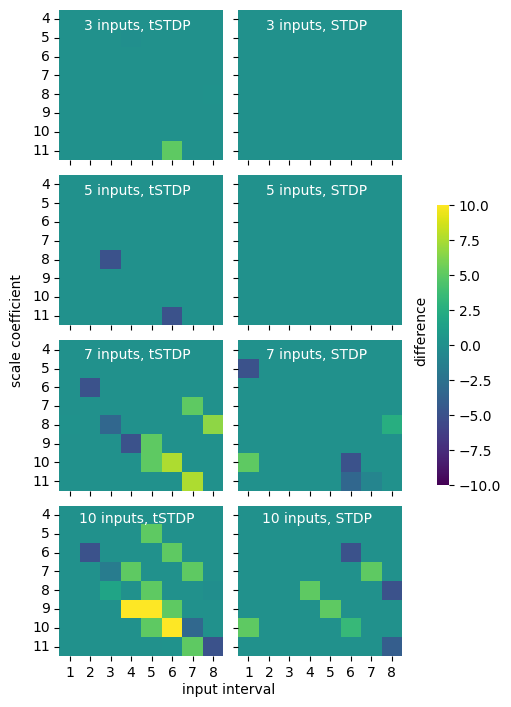

In [5]:
plt.style.use(['default'])
fig = plt.figure(figsize=(5, 15))
fig, axn = plt.subplots(4,2, sharex=True, sharey=True, figsize=(4,7))
cbar_ax = fig.add_axes([1.05, .3, .03, .4])
cbar_ax.set_frame_on(True)
for i, ax in enumerate(axn.flat):
    sns.heatmap(out[i], ax=ax, cmap='viridis', xticklabels=list(range(1,9)), yticklabels=list(range(4,12)), cbar=i == 0, vmin=-10, vmax=10, cbar_ax=None if i else cbar_ax)
fig.text(.0, .445, 'scale coefficient', ha='center', rotation='vertical')
fig.text(1.01, .475, 'difference', ha='center', rotation=90)
fig.text(.53, .001, 'input interval', ha='center', rotation=0)

fig.text(.3, .95, '3 inputs, tSTDP', ha='center', rotation=0, color='white')
fig.text(.3, .715, '5 inputs, tSTDP', ha='center', rotation=0, color='white')
fig.text(.3, .48, '7 inputs, tSTDP', ha='center', rotation=0, color='white')
fig.text(.3, .245, '10 inputs, tSTDP', ha='center', rotation=0, color='white')

fig.text(.75, .95, '3 inputs, STDP', ha='center', rotation=0, color='white')
fig.text(.75, .715, '5 inputs, STDP', ha='center', rotation=0, color='white')
fig.text(.75, .48, '7 inputs, STDP', ha='center', rotation=0, color='white')
fig.text(.75, .245, '10 inputs, STDP', ha='center', rotation=0, color='white')
fig.tight_layout()

In [6]:
def load_np(neus = (3,5,7,10)):
    weights = []
    for i in neus:
        weights.append(np.load(f'bfnaics24_{i}_neus.npy'))
    return weights

def get_certain_weights(dfs, weights):
    ws = []
    for i in range(len(dfs)):
        sample = dfs[i]
        sample_w = weights[i]
        df_diff = sample[sample['diff'] > .2]
        df_t = list(df_diff[df_diff['l_rule'] == 't_stdp'].index)
        df_p = list(df_diff[df_diff['l_rule'] == 'pair_stdp'].index)
        wt = sample_w[df_t]
        wp = sample_w[df_p]
        #print(wp[3])
        ws.append(np.sum(wt, axis=0) / wt.shape[0])
        ws.append(np.sum(wp, axis=0) / wp.shape[0])
    return ws

ws = load_np()
weights = get_certain_weights(dfs, ws)

C:\Users\iamkg0\AppData\Local\Temp\ipykernel_15584\665485788.py:19: RuntimeWarning: invalid value encountered in divide
  ws.append(np.sum(wp, axis=0) / wp.shape[0])
C:\Users\iamkg0\AppData\Local\Temp\ipykernel_15584\665485788.py:18: RuntimeWarning: invalid value encountered in divide
  ws.append(np.sum(wt, axis=0) / wt.shape[0])


3
5
7
10
3
5
7
10
[nan nan nan]


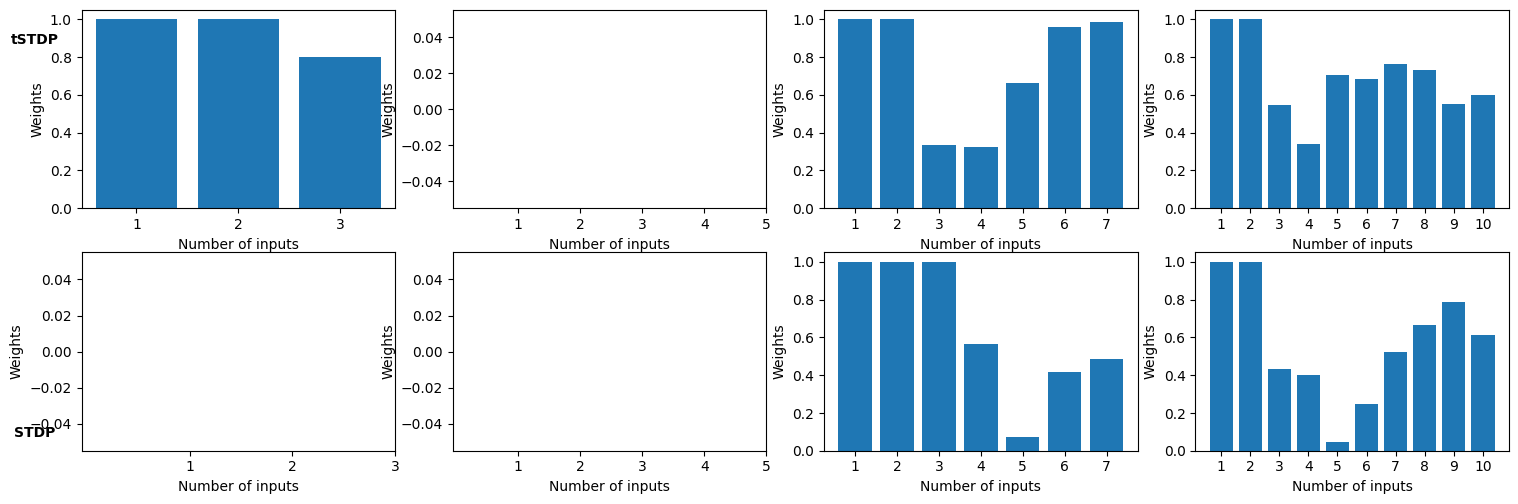

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,5))
fig.tight_layout()
c = 0
for i in range(2):
    if c:
        c /= c
    c = int(c)
    for j in range(4):
        print(weights[c].shape[0])
        ax[i][j].bar(list(range(1, weights[c].shape[0]+1)), weights[c])
        ax[i][j].set_xlabel('Number of inputs')
        ax[i][j].set_ylabel('Weights')
        plt.sca(ax[i][j])
        plt.xticks(list(range(1, weights[c].shape[0]+1)))
        c += 2
fig.text(.0001, .89, 'tSTDP', ha='center', rotation=0, color='black', weight='bold')
fig.text(.0001, .105, 'STDP', ha='center', rotation=0, color='black', weight='bold')
print(weights[1])

In [8]:
from bfnaics import *
plt.style.use(['default'])
neus_nums = (10, )
for i in neus_nums:
    cfg['num_inp_neu'] = i
    data, weights, counter = pipe(cfg, counter)

Attempt 0 with lr=0.05, scale=4, awaiting_time=1, l_rule=t_stdp, num_input=3:


KeyboardInterrupt: 

In [9]:
from model import *
from neurons import *
from synaptics import *
from utils import *
from protocols import *
from shallow_models import *
from vis_functions import *

Total number of spikes = 1999, avg frequency = 19.99
Total number of spikes = 20, avg frequency = 20.0
Total number of spikes = 10, avg frequency = 10.0


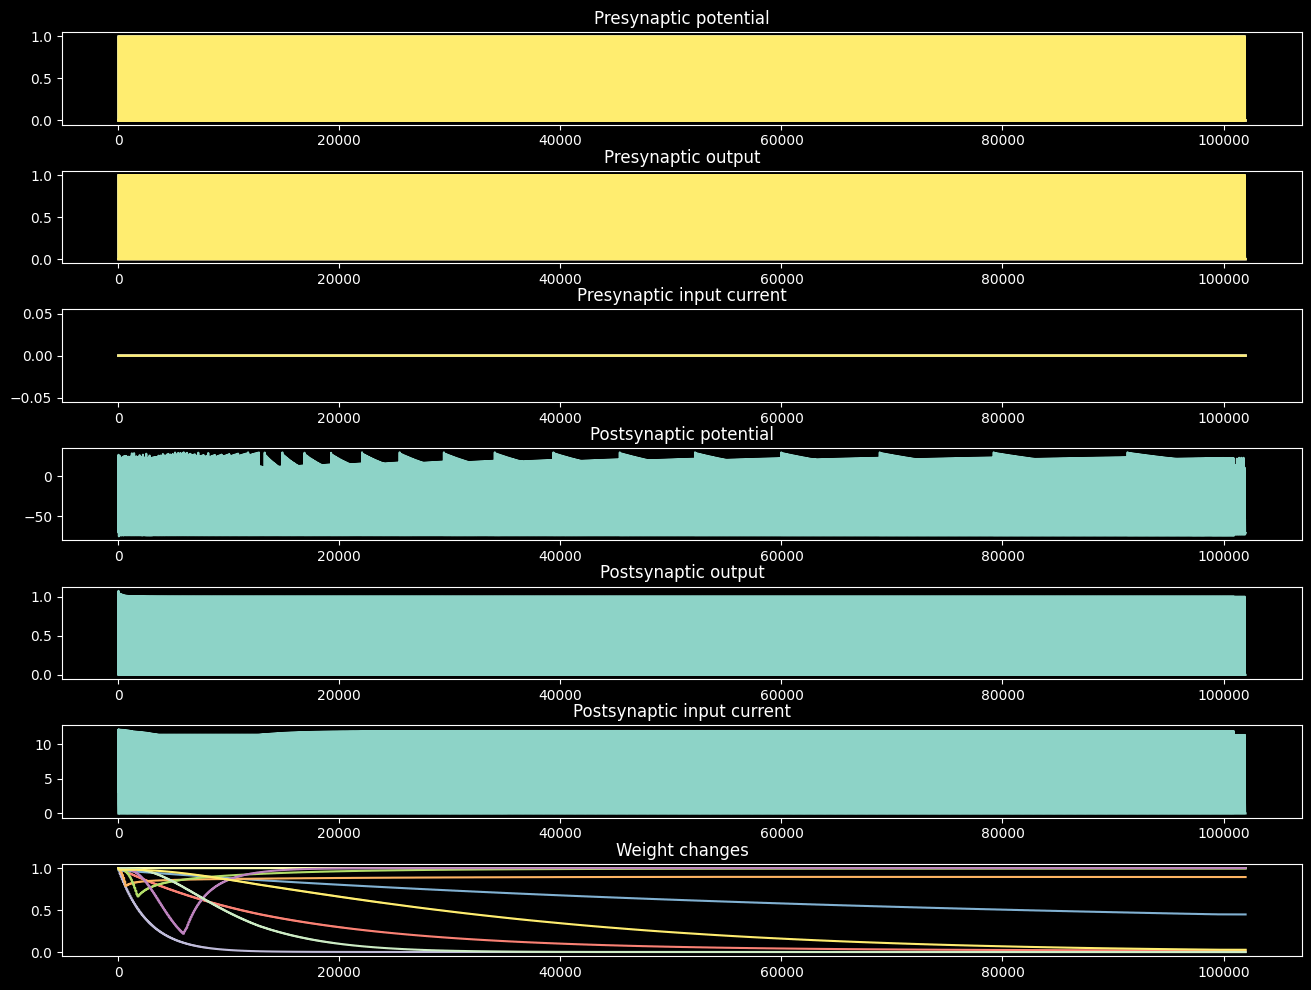

In [11]:
num_input = 10
snn = bfnaics_24_model(num_input=num_input, rt=100, scale=9)
aw = 4
awaiting = list(range(0, aw*num_input, aw))
lr = .05
l_rule = 't_stdp'
snn, gatherer, familiar, new = bfnaics24(snn, awaiting, lr=lr, l_rule=l_rule,
                                                    learning_time=100000,
                                                    test_time=1000, draw_stats=True)

Total number of spikes = 0, avg frequency = 0.0
Total number of spikes = 20, avg frequency = 20.0
Total number of spikes = 10, avg frequency = 10.0


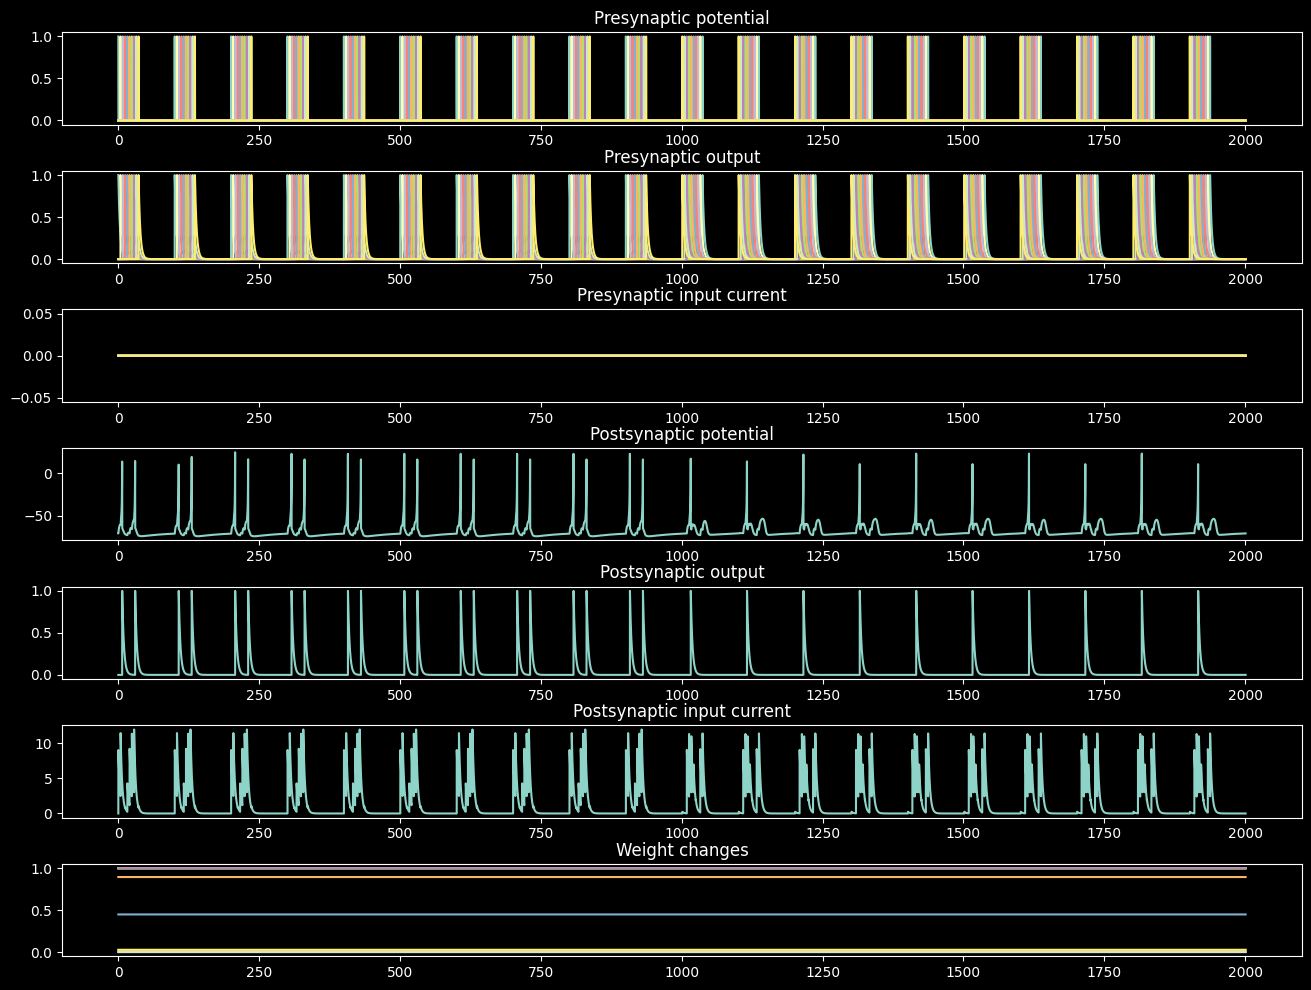

In [12]:
snn, gatherer, familiar, new = bfnaics24(snn, awaiting, lr=lr, l_rule=l_rule,
                                                    learning_time=1,
                                                    test_time=1000, draw_stats=True)

In [73]:
from matplotlib.patches import ConnectionPatch
import matplotlib


def draw_stats_naics(pre_vs, pre_impulses, pre_Is, post_vs, post_impulses, post_Is, ws, time_range, resolution=None, fwidth=16, fheight=12):
    matplotlib.rc('xtick', labelsize=12)
    matplotlib.rc('ytick', labelsize=12)
    if not isinstance(time_range, np.ndarray) or isinstance(time_range, list):
        if not resolution:
            raise Exception('I require integration step or time array')
        time_range = np.arange(int(time_range / resolution)) * resolution
    figure, axis = plt.subplots(4, 1)
    
    plt.subplots_adjust(hspace=.5)
    figure.set_figwidth(fwidth)
    figure.set_figheight(fheight)
    for i in range(pre_vs.shape[0]):
        pre_imps = axis[0]
        pre_imps.plot(time_range, pre_impulses[i])
    for j in range(post_vs.shape[0]):
        post_voltage = axis[1]
        post_imps = axis[2]
        post_inp_is = axis[3]
        post_voltage.plot(time_range, post_vs[j])
        post_imps.plot(time_range, post_impulses[j])
        post_inp_is.plot(time_range, post_Is[j])
    plt.text(x=976, y=-3.5, s='^', fontsize=28, weight='extra bold')
    plt.text(x=976, y=16.1, s='^', fontsize=28, weight='extra bold')
    plt.text(x=976, y=35.7, s='^', fontsize=28, weight='extra bold')
    plt.text(x=976, y=55.4, s='^', fontsize=28, weight='extra bold')
    pre_imps.set_title('Presynaptic output', fontsize=15)
    post_voltage.set_title('Postsynaptic potential', fontsize=15)
    post_imps.set_title('Postsynaptic output', fontsize=15)
    post_inp_is.set_title('Postsynaptic input current', fontsize=15)
    plt.show()

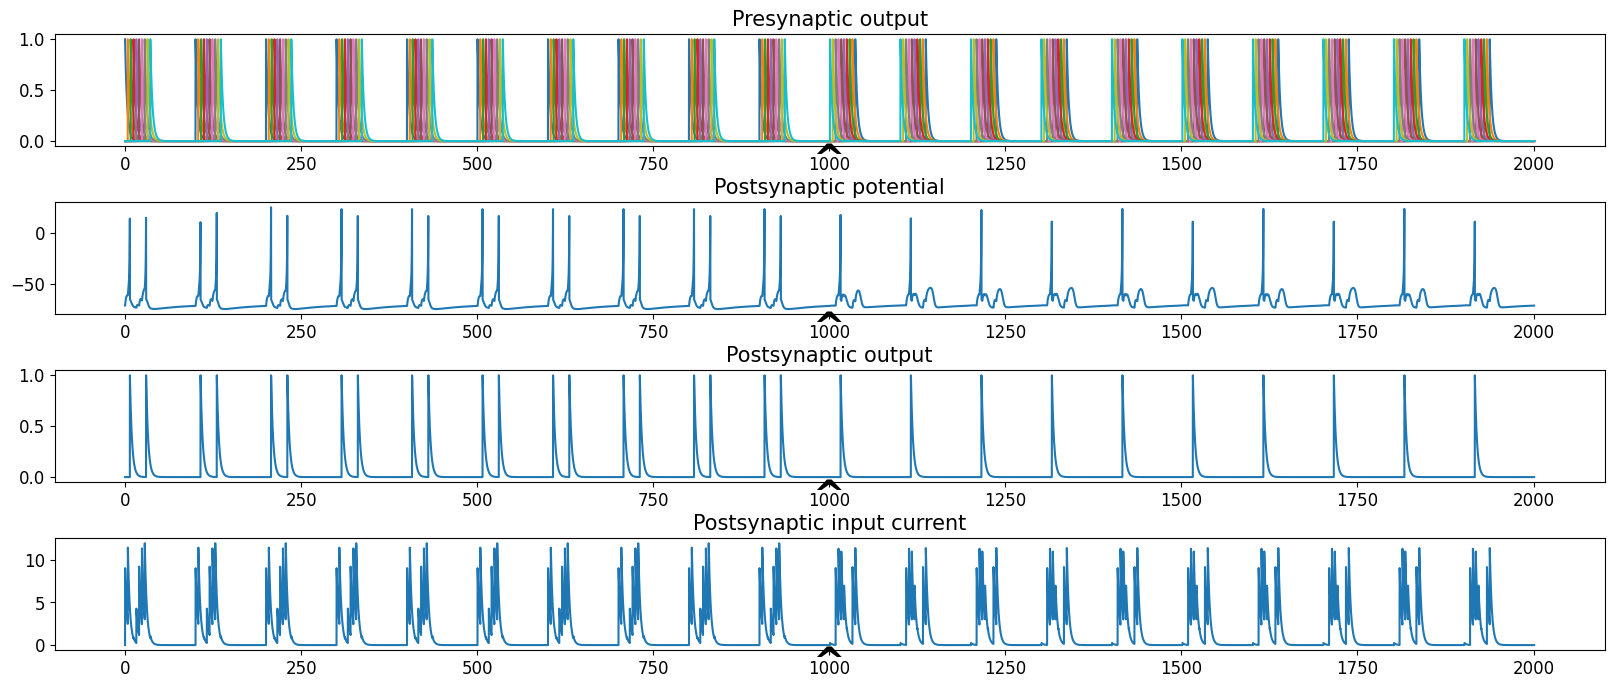

In [74]:
plt.style.use(['default'])
draw_stats_naics(*gatherer.get_stats(), np.array(list(range(int(len(gatherer.vs[0]))))) * .1, fwidth=20, fheight=8)

In [51]:
ws = []
for i in range(10):
    ws.append(snn.get_weight((i, 10)))

<BarContainer object of 10 artists>

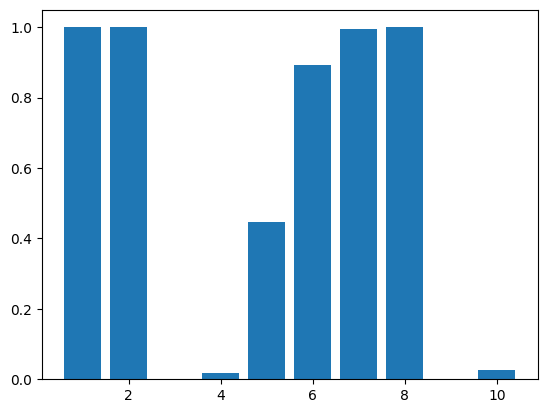

In [53]:
plt.bar(list(range(1, 11)), ws)